In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [43]:
train_target = pd.read_csv("hw11t3v1_target.txt", header=None)
test_target = pd.read_csv("hw11t3v1_target_test.txt", header=None)
train = pd.read_csv("hw11t3v1_train.txt", header=None, sep='\t')
test = pd.read_csv("hw11t3v1_test.txt", header=None, sep='\t')

train_target.columns = ["y"]
test_target.columns = ["y"]


Посмотрим, как меняется расположение точек в двумерном пространстве в зависимости от значения перплексии (сглаженный показатель эффективного числа соседей) для значений перплексии в диапазоне 30 - 150

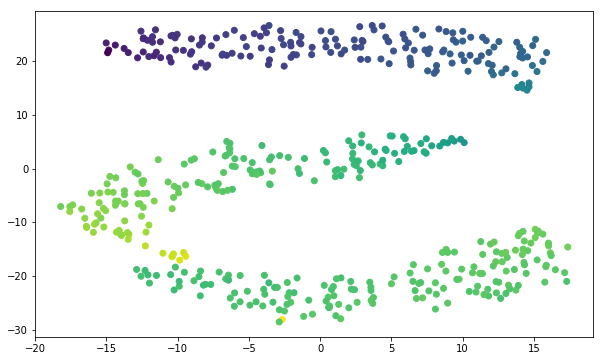

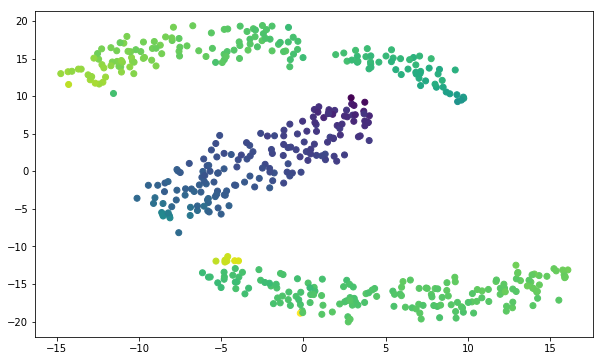

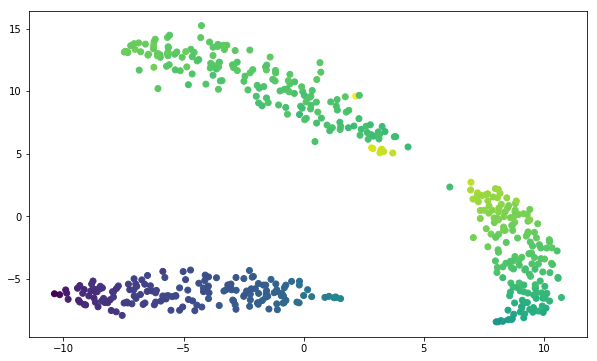

In [20]:
for perplexity in [30, 50, 75]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(train.values)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_target.values)
    plt.show()
    

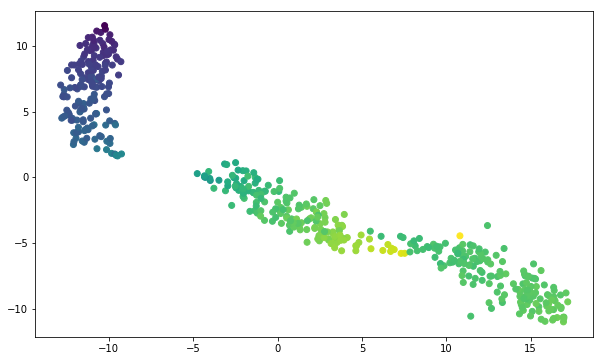

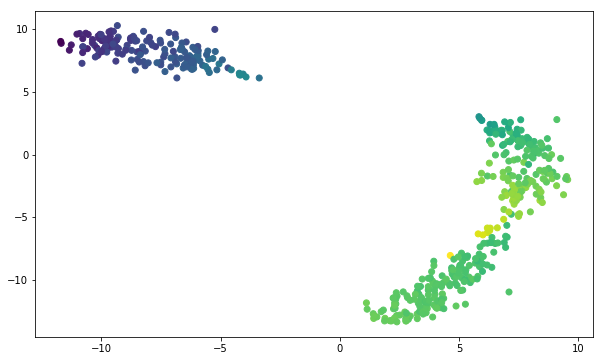

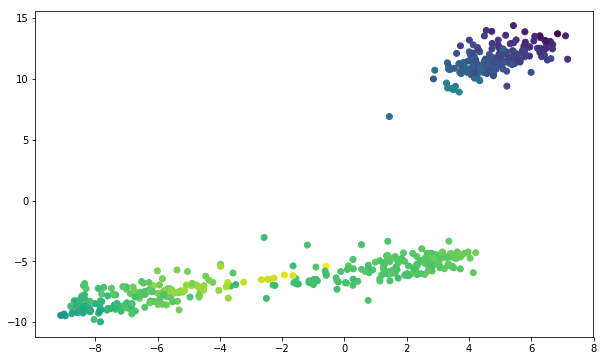

In [21]:
for perplexity in [100, 125, 150]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(train.values)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=train_target.values)
    plt.show()
    

Меньшие и большие значения дают большую размытость/ меньшую класстеризацию.

In [53]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def smape(y, f, **kwargs):
    res = 2. * 100. / float(len(y))
    y = list(map(float, y))
    f = list(map(float, f))
    res *= np.sum([abs(f[i] - y[i]) / (abs(y[i]) + abs(f[i])) for i in range(len(y))])
    return 100 - res

smape_score = metrics.make_scorer(smape)


In [54]:

def apply_regressor(train, train_target, perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(train.values)

    y = np.array(list(map(lambda x: [x],train_target["y"].values)))

    parameters = {"C": np.arange(0.3, 10, 0.5), 'epsilon': np.arange(0.1, 2, 0.2)}

    clf = SVR()
    regress = GridSearchCV(clf, parameters, scoring=smape_score)
    regress.fit(X_hat, y)
    print(regress.best_estimator_, regress.best_score_)



In [56]:
import warnings
warnings.filterwarnings("ignore")

for perplexity in[30, 50, 75, 100, 125, 150, 160, 175, 180]:
    apply_regressor(train, train_target,perplexity)
    

SVR(C=9.8000000000000007, cache_size=200, coef0=0.0, degree=3,
  epsilon=0.10000000000000001, gamma='auto', kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False) 6.84665863836
SVR(C=9.8000000000000007, cache_size=200, coef0=0.0, degree=3,
  epsilon=0.10000000000000001, gamma='auto', kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False) 9.7036144089
SVR(C=9.8000000000000007, cache_size=200, coef0=0.0, degree=3,
  epsilon=1.9000000000000004, gamma='auto', kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False) 19.3477257205
SVR(C=9.8000000000000007, cache_size=200, coef0=0.0, degree=3,
  epsilon=0.50000000000000011, gamma='auto', kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False) 26.8303101925
SVR(C=9.8000000000000007, cache_size=200, coef0=0.0, degree=3,
  epsilon=1.5000000000000004, gamma='auto', kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False) 46.0937639921
SVR(C=9.8000000000000007, cache_size=2

Жадный поиск с кросс-валидацией показал лучшее значение SMAPE при perplexity = 150

In [61]:
model = SVR(C=9.8000000000000007, cache_size=200, coef0=0.0, degree=3,
  epsilon=0.10000000000000001, gamma='auto', kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)

y = np.array(list(map(lambda x: [x],train_target["y"].values)))
y_test = np.array(list(map(lambda x: [x],test_target["y"].values)))

tsne = TSNE(n_components=2, perplexity=150)
X_hat = tsne.fit_transform(train.values)
train_hat = tsne.fit_transform(test.values)

model.fit(X_hat, y)
predictions = model.predict(train_hat)

print("100 - smape для лучшей модели-%.2f" % smape(y_test,predictions))


100 - smape для лучшей модели-98.62
